In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

In [ ]:
df = pd.read_csv("walmart_data.csv.txt")

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


We are given a sample of 5 Lakh consumers who had purchased from Walmart on black friday and we need to analyze customer purchase behaviour against customer characterstics for the population of 100 million customers.

so here we need to find measures on sample which can be inferred on population.

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.isna().any(axis = 0)

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [ ]:
df.info()

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df[df.duplicated()]

# no duplicate rows either

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Age")["Purchase"].mean().sort_values(ascending= False)

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

In [ ]:
df.groupby("City_Category")["Purchase"].mean().sort_values(ascending= False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Occupation")["Purchase"].mean().sort_values(ascending= False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().sort_values(ascending= False)

Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Gender")["Purchase"].mean().sort_values(ascending= False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

In [ ]:
df.groupby("Product_Category")["Purchase"].mean().sort_values(ascending= False)

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

##Customer buying behaviour based on sample of 5 Lakh consumers-

1. **Gender** - male tends to spends more as compared to female.

2. **Marital status**- consumers having marital status 0 spends more as compared to marital status 1.

3. **City category**- coustomers living in C city category spends more, whereas coustomers in A city category spends least.

4. **Age**- coustomers in age 51-55 years spends most, and customers in age 0-17 years spends least.

5. **product category**- consumers spends most on product category 10 and least on product category 13.

6. **occupation**- coustomers who have occupation of mask 17 spends most and customers who have occupation of mask 9 spends least.

7. **stay in current city**- customers who had lived in the city for 2 year spends most and customers who had not lived in the city spends least.


Above are basic info from the sample provided of 5 Lakh customers, where in actually walmart has more than 100 million consumers.

similarly we need to find customer purchase behaviour for the whole population.

##Relation between customer purchase behaviour and gender

In [ ]:
x_male = df[df["Gender"]=="M"]["Purchase"]

In [ ]:
x_male.mean()

# sample mean

9437.526040472265

In [ ]:
# now need to check if we can infer the population mean from the sample mean or not

In [ ]:
# since we have sample of 5 Lakh consumers, so taking sample size of 50000 in order to calculate sample mean

In [ ]:
# using bootstrap method

x_male_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_male, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_male_BS.append(bootstrapped_mean)

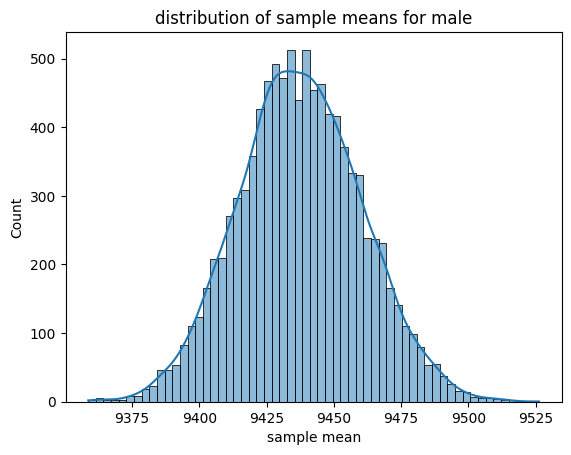

In [ ]:
sns.histplot(x_male_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for male", fontsize = 12)
plt.show()

In [ ]:
# now since sample means follows normal distribution, so here we can infer about population from sample

In [ ]:
np.percentile(x_male_BS, [0.5, 99.5])

array([9381.2960436, 9496.5645768])

In [ ]:
x_female = df[df["Gender"]=="F"]["Purchase"]

In [ ]:
x_female.mean()

8734.565765155476

In [ ]:
x_female_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_female, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_female_BS.append(bootstrapped_mean)

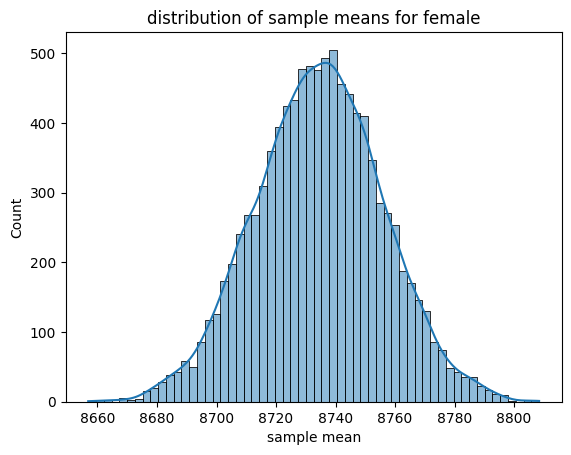

In [ ]:
sns.histplot(x_female_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for female", fontsize = 12)
plt.show()

In [ ]:
# now since sample means follows normal distribution, so here we can infer about population from sample

In [ ]:
np.percentile(x_female_BS, [0.5, 99.5])

array([8679.6980328, 8788.900846 ])

**observations on confidence level, confidence interval, sample size**

AS we increase sample size say from 10000 to 20000 to 50000, variation of mean from sample mean decreases means sample means are less distributed.

AS we increase confidence level say from 90 to 95 to 99, the interval for confidence interval increases that is the lower and upper limit moves away, since we are considering more area under probability.

###**Conclusion**-

when taking sample size of 50,000, from the 5 Lakh consumers, we found-

male - 99% [9427.314565 , 9541.0452551]

female - 99%  [8743.9521524, 8851.2099073]

so we can say there is **99% probability** of population mean of purchase/average purchase amount for male to lie in **[9427.314565 , 9541.0452551]**.

and there is **99% probability** of population mean of purchase/ average purchase amount of female to lie in **[8743.9521524, 8851.2099073].**

**As average purchase amount of male is more as compared to female so we can conclude that male spends more as compared to females on Walmart stores during black friday..**

##Relation between customer purchase behaviour and marital status

In [ ]:
x_1 = df[df["Marital_Status"]==1]["Purchase"]

In [ ]:
x_1.mean()

9261.174574082374

In [ ]:
# using bootstrap method

x_1_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_1, size=150000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_1_BS.append(bootstrapped_mean)

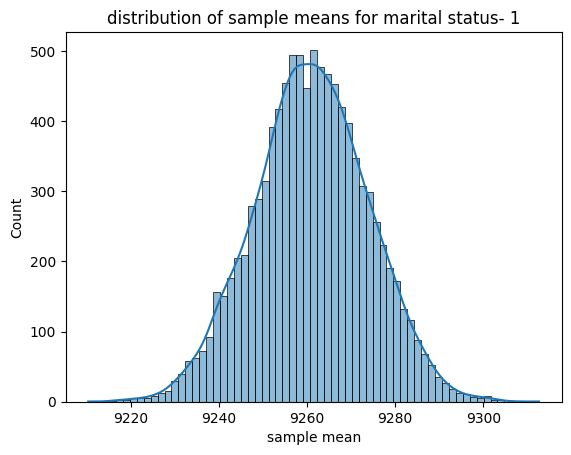

In [ ]:
sns.histplot(x_1_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for marital status- 1", fontsize = 12)
plt.show()

In [ ]:
# now since sample means follows normal distribution, so here we can infer about population from sample

In [ ]:
np.percentile(x_1_BS, [10,90])

array([9244.17772133, 9277.661138  ])

In [ ]:
x_0 = df[df["Marital_Status"]==0]["Purchase"]

In [ ]:
x_0.mean()

9265.907618921507

In [ ]:
# using bootstrap method

x_0_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_0, size=150000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_0_BS.append(bootstrapped_mean)

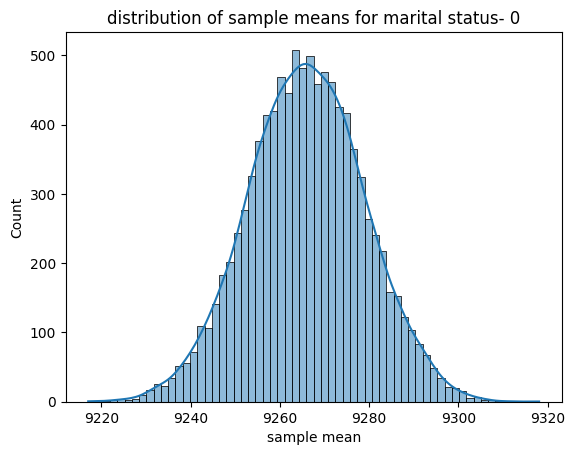

In [ ]:
sns.histplot(x_0_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for marital status- 0", fontsize = 12)
plt.show()

In [ ]:
# now since sample means follows normal distribution, so here we can infer about population from sample

In [ ]:
np.percentile(x_0_BS, [10,90])

array([9249.27982267, 9282.649932  ])

###**Observations**-

since the sample mean is very very near to each other, hence

even after taking sample size of 30,000, and Confidence level of 90%, the confidence interval overlaps because of which we cannot interpret about the population mean.

even after taking sample size of 50,000, and Confidence level of 90%, the confidence interval overlaps because of which we cannot interpret about the population mean.

even after taking sample size of 50,000, and Confidence level of 85%, the confidence interval overlaps because of which we cannot interpret about the population mean.

so after trying different combinations, we are settling at sample size 1,50,000 and confidence level 80%

###**Conclusion**-

marital status-1  = 80% [9317.81454667, 9350.42624733]

marital status-0 = 80% [9283.031492  , 9315.90296667]

so we can say there in **80% probability** that the population mean of purchase for the consumers having **marital status-1** lies in **[9317.81454667, 9350.42624733]**.

and there is **80% probability** that the population mean of purchase for hte consumers having **marital status-0** lies in **[9283.031492  , 9315.90296667]**

**as avergae purchase of marital status 1 is more as compared to marital status 0 so we can say consumers having marital status 1 spends more as compared to consumers having marital status 0 on walmart stores during black friday..**

##Relation between customer purchase behaviour and city category

In [ ]:
x_A = df[df["City_Category"]=="A"]["Purchase"]

In [ ]:
x_A.mean()

8911.939216084484

In [ ]:
# using bootstrap method

x_A_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_A, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_A_BS.append(bootstrapped_mean)

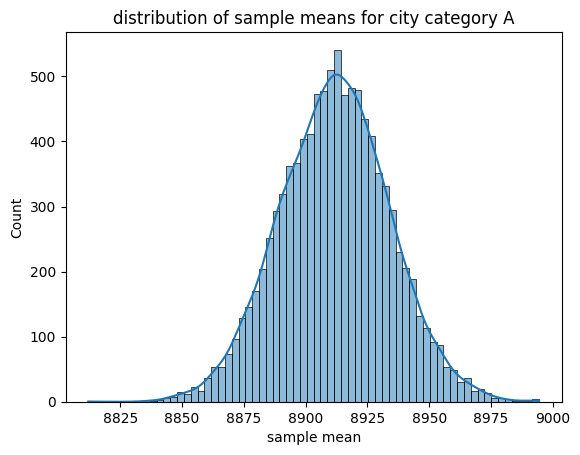

In [ ]:
sns.histplot(x_A_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for city category A", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_A_BS, [0.5,99.5])

array([8854.1289482, 8969.9202655])

In [ ]:
x_B = df[df["City_Category"]=="B"]["Purchase"]

In [ ]:
x_B.mean()

9151.300562781986

In [ ]:
x_B_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_B, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_B_BS.append(bootstrapped_mean)

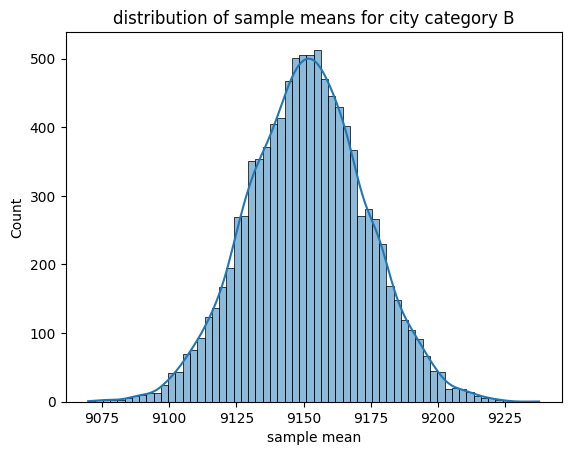

In [ ]:
sns.histplot(x_B_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for city category B", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_B_BS, [0.5,99.5])

array([9095.1544679, 9208.4317616])

In [ ]:
x_C = df[df["City_Category"]=="C"]["Purchase"]

In [ ]:
x_C.mean()

9719.92099313568

In [ ]:
x_C_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_C, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_C_BS.append(bootstrapped_mean)

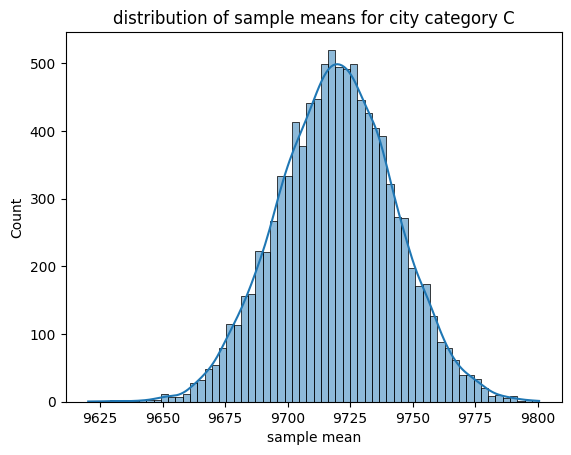

In [ ]:
sns.histplot(x_C_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for city category C", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_C_BS, [0.5,99.5])

array([9660.7935415, 9778.6027004])

###**Observations**-

when we are taking sample size of 10,000 from 5 Lakh consumers, with 95% confidence level we are getting overlap in confidence interval due to which we cannot estimate the population mean with certainity.

hence when we took sample size of 50,000 from 5 Lakh consumers, with 99% confidence level , then we are getting unique confidence interval, so in this case we can estimate the population mean with certainity.

###**Conclusions-**

city category A -  99% [8871.8149043, 8984.0417952]

city category B - 99% [9120.1489513, 9232.2596847]

city category C - 99% [9779.818469 , 9897.1583146]

so we can say, there is **99% probability** that the population mean of purchase/ average purchase for **city category A** consumers lie in **[8871.8149043, 8984.0417952]**.

there is **99% probability** that the population mean of purchase for **city category B** consumers lie in **[9120.1489513, 9232.2596847]**.

there is **99% probability** that the population mean of purchase for **city category C** consumers lie in **9779.818469 , 9897.1583146]**.


**As average purchase of city category C consumers is more as compared to city category A consumers hence to conclude consumers from city category C spend most on walmart stores on black friday, and consumers from city category A spends least**


##Relation between consumer purchase behaviour and age group

In [ ]:
x_51_to_55 = df[df["Age"]=="51-55"]["Purchase"]

In [ ]:
x_51_to_55.mean()

9534.808030960236

In [ ]:
x_51_to_55_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_51_to_55, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_51_to_55_BS.append(bootstrapped_mean)

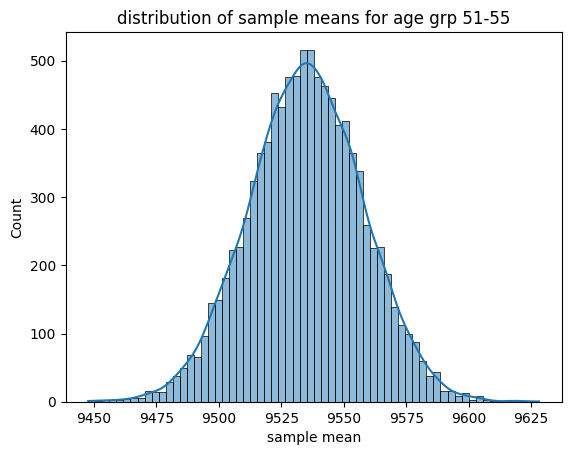

In [ ]:
sns.histplot(x_51_to_55_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 51-55", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_51_to_55_BS, [2.5,97.5])

array([9489.8713255, 9578.7878935])

In [ ]:
x_above_55 = df[df["Age"]=="55+"]["Purchase"]

In [ ]:
x_above_55.mean()

9336.280459449405

In [ ]:
x_above_55_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_above_55, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_above_55_BS.append(bootstrapped_mean)

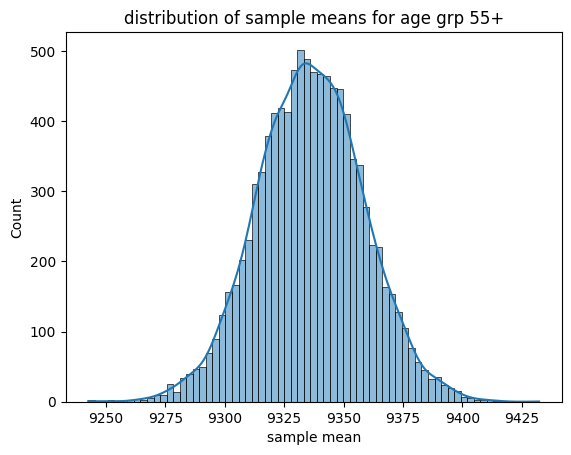

In [ ]:
sns.histplot(x_above_55_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 55+", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_above_55_BS, [2.5,97.5])

array([9292.482246, 9380.040457])

In [ ]:
x_36_to_45 = df[df["Age"]=="36-45"]["Purchase"]

In [ ]:
x_36_to_45_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_36_to_45, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_36_to_45_BS.append(bootstrapped_mean)

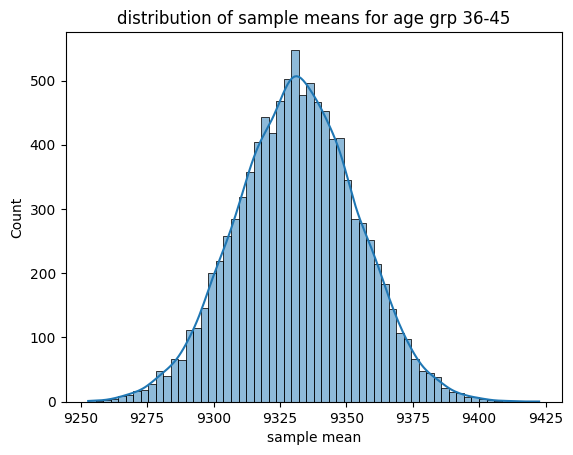

In [ ]:
sns.histplot(x_36_to_45_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 36-45", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_36_to_45_BS, [2.5,97.5])

array([9286.841067 , 9375.1324425])

In [ ]:
x_26_to_35 = df[df["Age"]=="26-35"]["Purchase"]

In [ ]:
x_26_to_35.mean()

9252.690632869888

In [ ]:
x_26_to_35_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_26_to_35, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_26_to_35_BS.append(bootstrapped_mean)

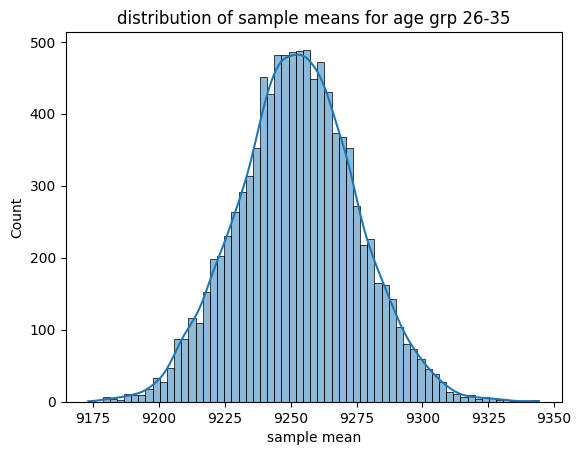

In [ ]:
sns.histplot(x_26_to_35_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 26-35", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_26_to_35_BS, [2.5,97.5])

array([9208.294183 , 9297.4660705])

In [ ]:
x_46_to_50 = df[df["Age"]=="46-50"]["Purchase"]

In [ ]:
x_46_to_50.mean()

9208.625697468327

In [ ]:
x_46_to_50_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_46_to_50, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_46_to_50_BS.append(bootstrapped_mean)

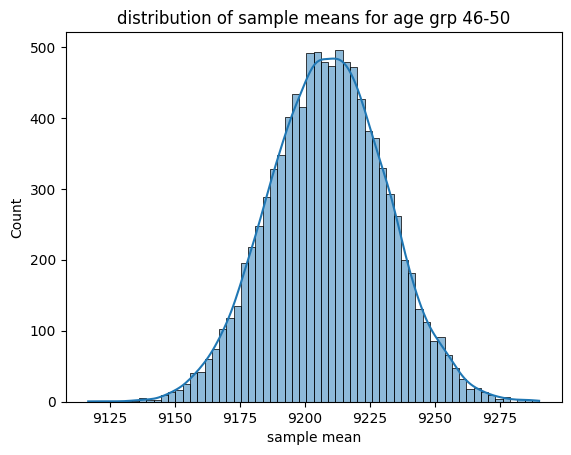

In [ ]:
sns.histplot(x_46_to_50_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 46-50", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_46_to_50_BS, [2.5,97.5])

array([9165.2007905, 9252.990934 ])

In [ ]:
x_18_to_25 = df[df["Age"]=="18-25"]["Purchase"]

In [ ]:
x_18_to_25.mean()

9169.663606261289

In [ ]:
x_18_to_25_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_18_to_25, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_18_to_25_BS.append(bootstrapped_mean)

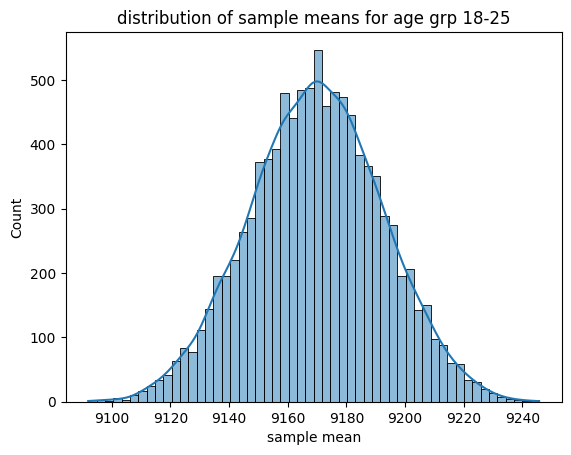

In [ ]:
sns.histplot(x_18_to_25_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 18-25", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_18_to_25_BS, [2.5,97.5])

array([9125.193991 , 9213.8458485])

In [ ]:
x_0_to_17 = df[df["Age"]=="0-17"]["Purchase"]

In [ ]:
x_0_to_17.mean()

8933.464640444974

In [ ]:
x_0_to_17_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_0_to_17, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_0_to_17_BS.append(bootstrapped_mean)

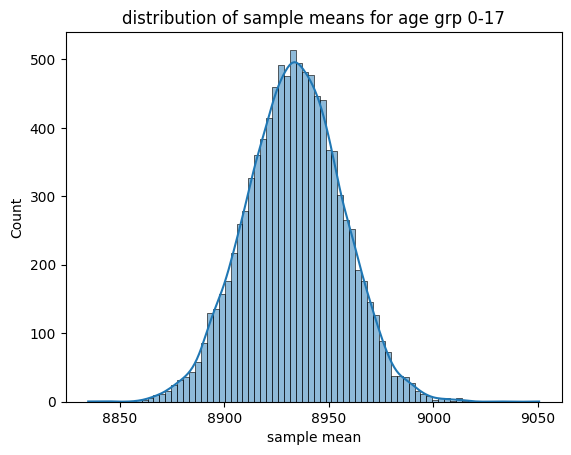

In [ ]:
sns.histplot(x_0_to_17_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for age grp 0-17", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_0_to_17_BS, [2.5,97.5])

array([8889.2040345, 8977.514536 ])

###**Observations-**

since sample means are very close to each other, hence even after taking sample size of 10,000, and confidence level 90% , we are getting overlapping confidence interval.

0-17 = [8848,9017]

18-25 = [9087-9254]

26-35 = [9171-9334]

36-45 = [9177-9377]

46-50 = [9125-9290]

51-55 = [9449-9619]

55+ = [9255-9420]

even after taking sample size 20,000 and confidence level 90%, still there are overlapping confidence intervals, due to which we cannot say population mean with certainity for some age groups.

0-17 = [8873-8992]

18-25 = [9111-9227]

26-35 = [9194-9309]

36-45 = [9273-9388]

46-50 = [9150-9266]

51-55 = [9475-9593]

55+ = [9278-9393]


even after taking sample size 20,000 and confidence level 85%, still there are overlapping confidence intervals, due to which we cannot say population mean with certainity for some age groups.


0-17 = [8881-8984]

18-25 = [9118-9221]

26-35 = [9201-9302]

36-45 = [9281-9381]

46-50 = [9158-9259]

51-55 = [9482-9585]

55+ = [9285-9386]


so in this case, we can only estimate population mean of those age groups which do not have overlapping intervals..


so,finally using sample size 50,000 and 95% confidence level to get maximum number of non-overlapping intervals...


###**Conclusions**-

with the sample size of 50,000 and confidence level 95% we can say we have most number of non-overlapping intervals-

0-17 yrs = 95% [9025.9356105, 9115.6287355]

18-25 yrs = 95% [9143.598132, 9231.590754]

36-45 yrs = 95% [9342.4957585, 9429.896897]

51-55 yrs = 95% [9591.5477635, 9678.869179]

55+ yrs =  95%  [9379.01907  , 9463.3024455]

we can say there is **95% probability** that the population mean of the purchase for the consumers in age group **0-17 yrs** lie in **[9025.9356105, 9115.6287355]**

there is **95% probability** that the population mean of the purchase for the consumers in age group **18-25 yrs** lie in **[9143.598132, 9231.590754]**

there is **95% probability** that the population mean of the purchase for the consumers in age group **36-45 yrs** lie in **[9342.4957585, 9429.896897]**

there is **95% probability** that the population mean of the purchase for the consumers in age group **51-55 yrs** lie in **[9591.5477635, 9678.869179]**

there is **95% probability** that the population mean of the purchase for the consumers in age group **55+ yrs** lie in **[9379.01907  , 9463.3024455]**

**AS avergae purchase of consumers in age group 51-55 yrs is more as compared to avergae purchase of age grp 0-17 yrs so, to conclude, we can say consumers in age group 0-17 yrs spends least on walmart stores during black friday, and consumers in age group 51-55 yrs spends most on walmart stores.**

##Relation between consumer purchase behaviour and stay in current city

In [ ]:
x_0 = df[df["Stay_In_Current_City_Years"]=="0"]["Purchase"]

In [ ]:
x_0.mean()

9180.075122987177

In [ ]:
x_0_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_0, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_0_BS.append(bootstrapped_mean)

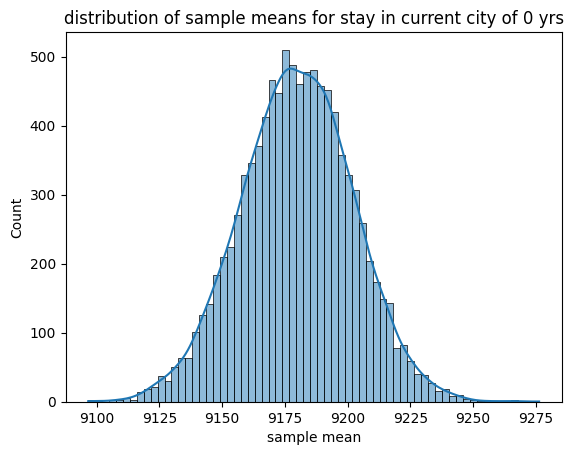

In [ ]:
sns.histplot(x_0_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for stay in current city of 0 yrs", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_0_BS, [5,95])

array([9142.834555, 9216.052571])

In [ ]:
x_1 = df[df["Stay_In_Current_City_Years"]=="1"]["Purchase"]

In [ ]:
x_1.mean()

9250.145923300364

In [ ]:
x_1_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_1, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_1_BS.append(bootstrapped_mean)

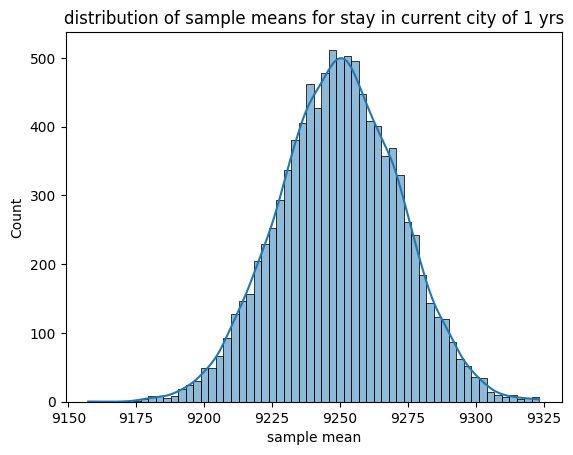

In [ ]:
sns.histplot(x_1_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for stay in current city of 1 yrs", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_1_BS, [5,95])

array([9212.763661, 9286.313753])

In [ ]:
x_2 = df[df["Stay_In_Current_City_Years"]=="2"]["Purchase"]

In [ ]:
x_2.mean()

9320.429810090536

In [ ]:
x_2_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_2, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_2_BS.append(bootstrapped_mean)

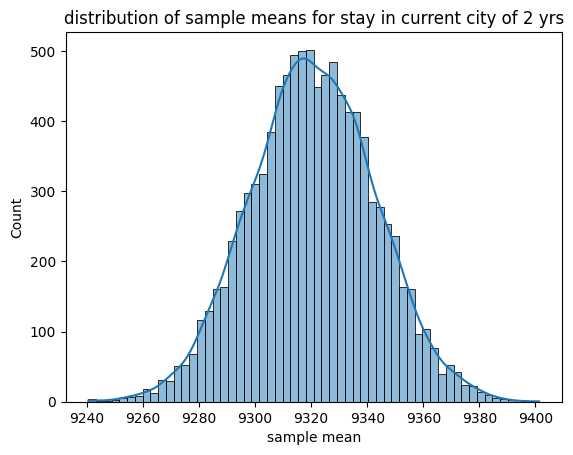

In [ ]:
sns.histplot(x_2_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for stay in current city of 2 yrs", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_2_BS, [5,95])

array([9284.12459 , 9356.814765])

In [ ]:
x_3 = df[df["Stay_In_Current_City_Years"]=="3"]["Purchase"]

In [ ]:
x_3.mean()

9286.904119221284

In [ ]:
x_3_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_3, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_3_BS.append(bootstrapped_mean)

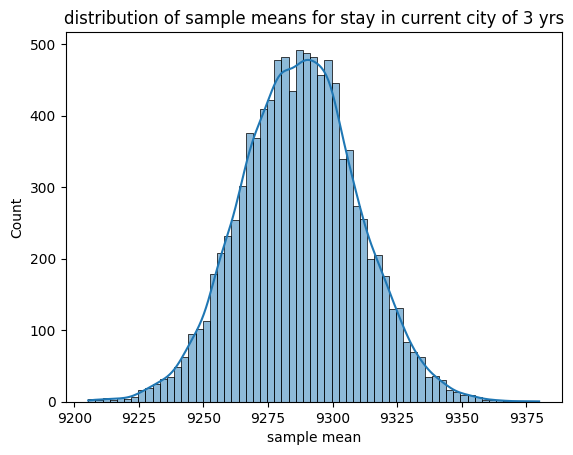

In [ ]:
sns.histplot(x_3_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for stay in current city of 3 yrs", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_3_BS, [5,95])

array([9250.777468, 9324.754535])

In [ ]:
x_4 = df[df["Stay_In_Current_City_Years"]=="4+"]["Purchase"]

In [ ]:
x_4.mean()

9275.59887165687

In [ ]:
x_4_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_4, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_4_BS.append(bootstrapped_mean)

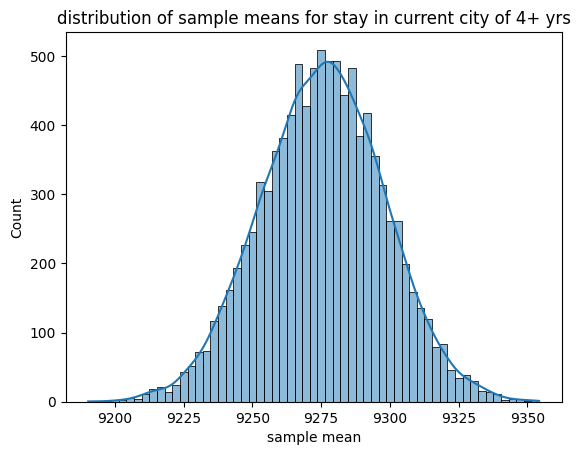

In [ ]:
sns.histplot(x_4_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for stay in current city of 4+ yrs", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_4_BS, [5,95])

array([9238.430346, 9312.271689])

###**Observations-**

with sample size 10,000 and confidence level 95%, we found all the confidence intervals are ovelapping due to which we cannot estimate population mean.

0 yrs= [9083-9277]

1 yrs = [9152-9349]

2 yrs = [9220-9418]

3 yrs = [9248-9445]

4+ yrs = [9252-9447]

even with sample size 10,000 and confidence level 90%, we found confidene intervals are still overlapping-

0 yrs= [9159-9322]

1 yrs = [9234-9399]

2 yrs = [9314-9478]

3 yrs = [9265-9427]

4+ yrs = [9268-9431]


even after using sample size 20,000 and confidence level 90%, we are getting overlapping confidence intervals.


finally after using sample size 50,000 and confidence interval 90%, we are getting some non-overlapping confidence intervals..

so extimating population mean of non-overlapping CI.

###**Conclusions**-

0 yrs = 90% [9205-9277]

1 yrs = 90% [9280-9352]

2 yrs = 90% [9359-9433]

so we can say there is **90% probability** that the population mean of purchase by consumers living in current city for **0 yrs** lie in **[9205-9277]**.

there is **90% probability **that the population mean of purchase by consumers living in current city for **1 yrs** lie in **[9280-9352]**

there is **90% probability** that the population mean of purchase by consumers living in current city for **2 yrs** lie in **[9359-9433]**

**AS average purchase of consumers who are living in current city for 2 yrs is more as compared to consumers living for 0 yrs in currect city so to conclude, consumers living in current city for 2 yrs spends most on walmart stores during black firday. and consumers living for 0 yrs in current city spend least.**

##Relation between consumer purchase behaviour and occupation

In [ ]:
x_17 = df[df["Occupation"]==17]["Purchase"]

In [ ]:
x_17.mean()

9821.478235896411

In [ ]:
x_17_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_17, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_17_BS.append(bootstrapped_mean)

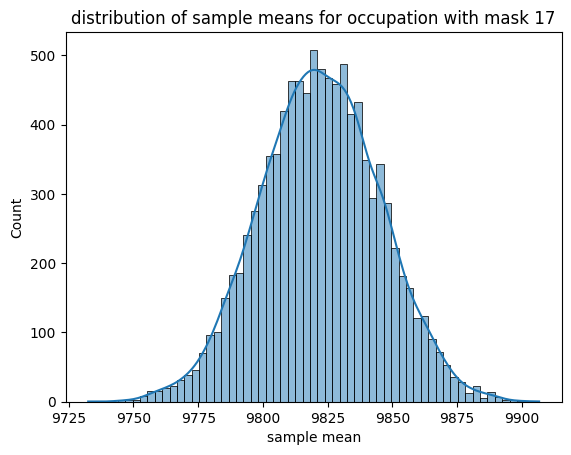

In [ ]:
sns.histplot(x_17_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for occupation with mask 17", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_17_BS, [0.5,99.5])

array([9762.3740598, 9881.6292742])

In [ ]:
x_9 = df[df["Occupation"]==9]["Purchase"]

In [ ]:
x_9.mean()

8637.74376092831

In [ ]:
x_9_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_9, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_9_BS.append(bootstrapped_mean)

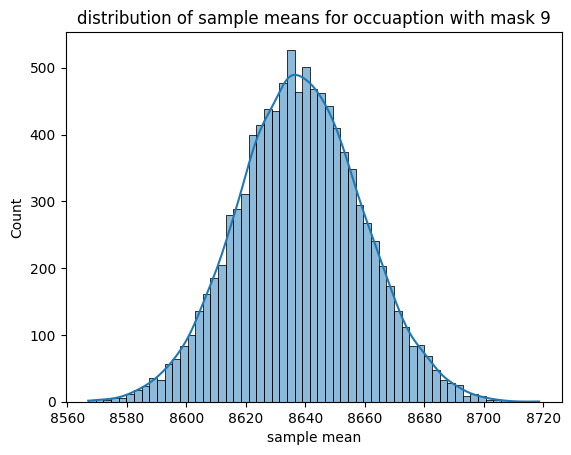

In [ ]:
sns.histplot(x_9_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for occuaption with mask 9", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_9_BS, [0.5,99.5])

array([8585.3060222, 8691.4637392])

###**Observations**-

since sample mean for different occupation is very near to each other, hence even after using sample size 50,000 and 80% confidence level, we are getting overlapping confidence intervals due to which estimation of population mean is not possible..

even after using sample size 100000 and 80% confidence level, we are atill getting overlapping confidence intervals.

we can safetly assume that the population mean will follow same trend as sample mean distribution is normal but we cannot estimate exact value for population mean

so only calculating population mean for least and most average purchase occupation.

still to be on safer side we are calcualting using sample size 50,000 and confidence level 99%..

##Conclusions-

occupation with mask 17 = 99% [9823.1179386, 9940.5559947]

occupation with mask 9 = 99% [8680.7934509, 8782.6890245]

so we can say there is **99% probability** that the population mean of purchase for the consumers who are in occupation of mask **17** lies in **[9823.1179386, 9940.5559947]**


there is 99% probability that the population mean of purchase for consumers who are in occupation with mask **9** lies in **[8680.7934509, 8782.6890245]**


**AS average purchase of consumers with occupation mask 17 is more as compared to occupation mask 9 hence, to conclude, we can say consumers in occupation with mask 17 spends most on walmart stores during balck friday and consumers with occupation mask of 9 spends least..**

##Relation between consumer purchase behaviour and product category

In [ ]:
x_10 = df[df["Product_Category"]==10.0]["Purchase"]

In [ ]:
x_10.mean()

19675.570926829267

In [ ]:
x_10_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_10, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_10_BS.append(bootstrapped_mean)

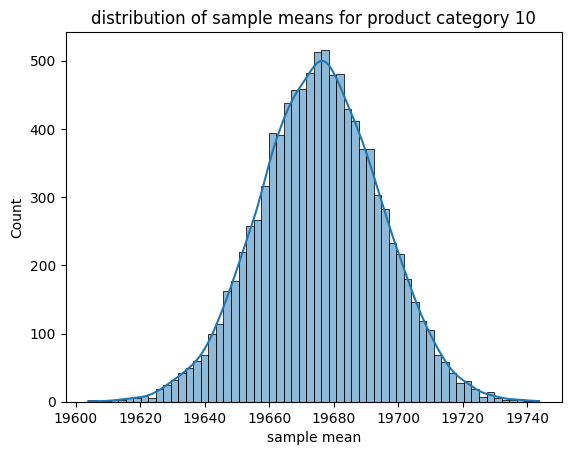

In [ ]:
sns.histplot(x_10_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for product category 10", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_10_BS, [0.5,99.5])

array([19627.1144012, 19723.196496 ])

In [ ]:
x_13 = df[df["Product_Category"]==13.0]["Purchase"]

In [ ]:
x_13.mean()

722.4006127230132

In [ ]:
x_13_BS = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(x_13, size=50000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    x_13_BS.append(bootstrapped_mean)

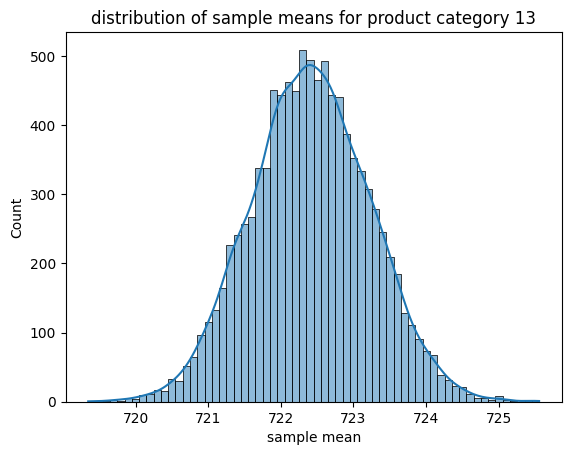

In [ ]:
sns.histplot(x_13_BS, kde = True)

plt.xlabel("sample mean", fontsize = 10)
plt.title("distribution of sample means for product category 13", fontsize = 12)
plt.show()

In [ ]:
np.percentile(x_13_BS, [5,95])

array([721.084291, 723.749749])

###**Observations**-

since the sample mean follows normal distribution hence population mean will also follow same trend, though we cannot estimate a certain value but the range will have same trend.

as there are many product categories. so focussing only on most and least average purchase product category with 99% confidence..



###**Conclusions**-

product category 10 = 99% [19610.1938841, 19707.9491012]

product category 13 = 99% [723.043591, 725.713658]

so we can say there is **99% probability** that the population mean of purchase for the **product category 10** lies in **[19610.1938841, 19707.9491012]**

and there is **99% probability** that the population mean of the purchase for the **product category 13** lies in **[723.043591, 725.713658]**

**to conclude, we can say, product category 10 is the catgeory on which consumers spends most on walmart stores during black friday. and least on product category 13.**


##**Recommendations--**

**Gender**-

Walmart can give extra discounts/female discounts to females in order to boost the purchase by females, in addition to that walmart can also try to increase the female product inventory which allows the females a wide variety of options so naturally they will attract to purchase from walmart.

**Marital status**-

Walmart can try to attract marital status 0 consumers by giving single/couples discount or can increase inventory of the products which are most in demand for the marital status 0 consumers, which will attract the consumers to come to walmart to buy from variety of options.


**City category**-

In order to boost purchase from city category A consumers, walmart can try to open new stores in the city, where people have easy access to stores like in residential area or shopping complexs, or walmart can replenish the stock in their stores in city which are most in demand by the consumers in the city or can also provide special discounts to a regualr consumer.


**Age**

to increase purchase by age group 0-17 yrs in walmart stores, we can give extra discounts on the products purchased for 0-17 yrs with the current order, or we can make the store to have more kids feel, which will attrct the kids more and in addition to that we can install some swings or games in the store which will attract kids more in the store.


**Occupation**-

to increase purchase from the consumers having occupation with mask 9, we can first look in the salary range for this occupation and then accordingly we can replenish our stock which are in their salary range and are in demand by them. moreover we can open some stores near their offices/sites where they have easy access which will attract them to shop for households items after the office hrs, or we can give some discounts on some products which will attract them.


**Stay in current city**-

to increase purchase by the consumers who are living in current city for 0 yrs, we can increase our reach on online platforms, where consumers can order easily from their nearby stores, on from nearby city. we can promise them fast and safe delivery and inhouse shopping experience on the orders placed online.


**Product Category**-

to increase purchase of the product category 13, we can increase the variety of the product or we can give some discounts on this product category or we can give them in offer buy and get free to consumers for them to experience the products.

